Check Python version

In [67]:
!python --version

Python 3.10.6


Import libraries

In [68]:
import json
import yaml
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **Extract Data**

In [69]:
# Through online GitHub
file_name = 'https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/air_passengers.csv'

In [70]:
train_df = pd.read_csv(file_name)

In [71]:
train_df.shape

(144, 2)

In [72]:
train_df.columns

Index(['ds', 'y'], dtype='object')

In [73]:
train_df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [74]:
train_df.tail()

,ds,y
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


Define the required time and target columns

In [75]:
time_col = train_df.columns[0]
target_col = train_df.columns[-1]
train_df[time_col] = train_df[time_col].astype(str)

Change target column to float

In [76]:
train_df[target_col] = train_df[target_col].astype(float)

In [77]:
train_df.head()

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


Plot graph

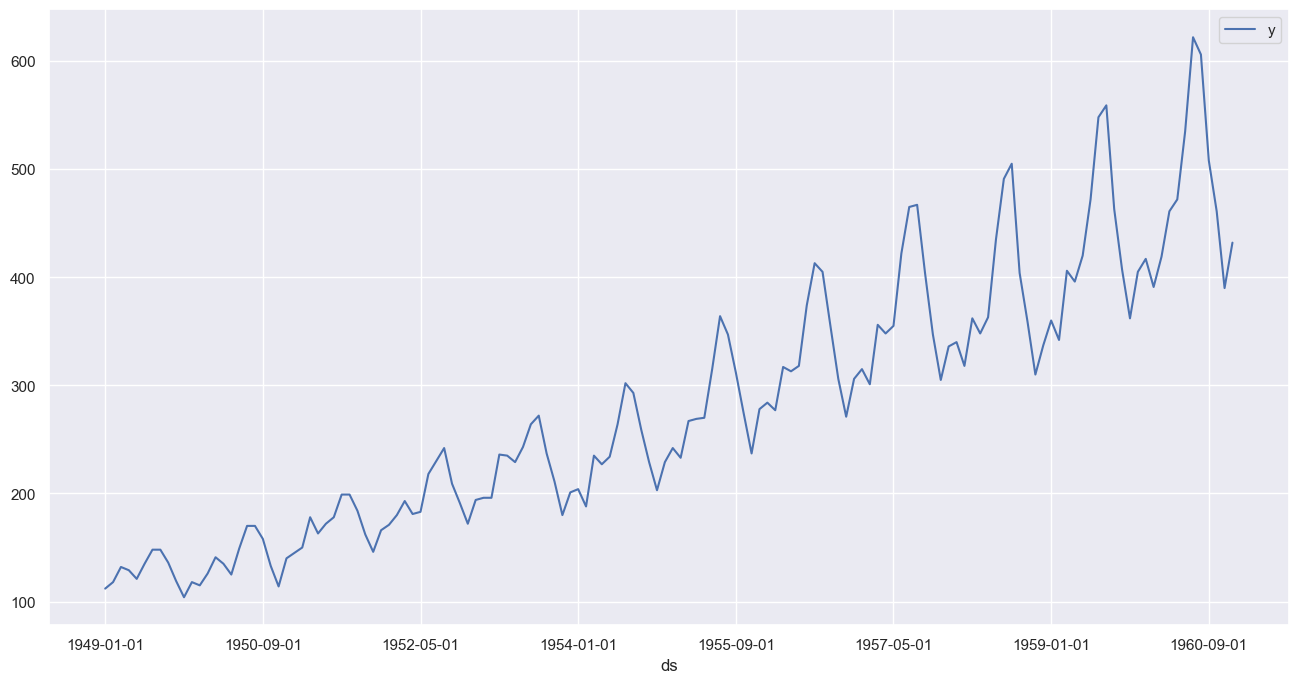

In [78]:
figsize = (16, 8)
train_df.set_index(time_col).plot(figsize=figsize);

### **Train API**

Train data: convert df to list-of-list

In [79]:
train_data = []

In [80]:
for value in train_df.values:
    train_data.append(list(value))

In [81]:
train_data[:10]

[['1949-01-01', 112.0],
 ['1949-02-01', 118.0],
 ['1949-03-01', 132.0],
 ['1949-04-01', 129.0],
 ['1949-05-01', 121.0],
 ['1949-06-01', 135.0],
 ['1949-07-01', 148.0],
 ['1949-08-01', 148.0],
 ['1949-09-01', 136.0],
 ['1949-10-01', 119.0]]

Define Model Request (optional)

In [82]:
# Default model request
# model_request = {
#     'type': 'meta_wa',  # 'meta_wa'
#     'scorers': ['smape', 'mape'],
#     'params': {
#         'preprocessors': [
#             {'type': 'simpleimputer', 'params': {'strategy': 'mean'}},
#             {'type': 'minmaxscaler'},
#         ],
#         'base_models': [
#             {'type': 'darts_autoets'},
#             {'type': 'darts_autoarima'},
#             {'type': 'darts_autotheta'},
#             {'type': 'stats_autotheta'},
#         ],
#     },
# }

# Customized model request
# model_request = {
#     'type': 'meta_wa',
#     'scorers': ['smape', 'mape'],
#     'param': {
#         'base_models': [
#             {'type': 'darts_autoarima'},
#             {'type': 'darts_autotheta'},
#             {'type': 'darts_autoets'},
#             {'type': 'stats_autotheta'},
#         ],
#     },
# }

Train API JSON Payload

In [83]:
api_json = {
    'data': train_data,
    # 'model': model_request  # (optional) can be commented out
}

Build URL

In [84]:
with open('url.yaml', 'r') as file:
    url_dict = yaml.safe_load(file)

In [85]:
# URL to our SYBIL AWS service
protocol = url_dict['protocol']
host = url_dict['host']
port = url_dict['port']
endpoint = 'train'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

In [86]:
# protocol, host, port

Call endpoint, receive response JSON, write to output file

In [87]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

CPU times: total: 0 ns
Wall time: 35.4 s


In [88]:
print(response)
train_json_out = response.json()  # dict output
# train_json_out = json.dumps(response.json())  # str output
# train_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

<Response [200]>


In [89]:
train_json_out

{'model': 'AgEBCH3EAQB4xAEA1i0BABgAAADNLQEA1CUAAD+AAC5wlGmUYXJhbG+MSZOMZ25fjGEHeJOMjIyMdWUubR9wTWyUc3MMYSlkZHJsYWdnZJRhDHOMbhBjcm6MaF90Xx+MdGVlk4xkbZR5YZRygV99YXJiZGKUZJSUeW6MSUGTKB+Uc25hlERJaHR4BHBsYXBjcmVhcnNtdHJcjIyTiIz//x9uAYxjdIxzlHIAlIWUS///bgGJFqdL3B6v8YITVeYouR9K7n/BUpQltviJy1ztkSJk9TfIWZssbv+QgxRW5ym6Sx+NHmDxgia3+YrMXe4wwQOUJclanC1vAJHTZKY3yGz9Px/QEqM0dgdJ2mte7zHCBJUmaPk7zF0BktRlpzjJC5zebx8ApDV3CErbbK4/gRKjR9gaq+1+D1HiJLVGOcoMnd9wAR9D1BaUcmJoBmhfjGmUbylHTGhhaWJueEl9b5SFlEtO/xqJdIaMlE4IaIZsX5R4b3hueH1llEpSS1KUAPZgAAD34BEAAPjgEgAA+eARAAD64BIAAPvgEQAf/GhhLm+MZQFflJRolDlfZLFoKACUaHSGaHWUaYxsTmgfbG1xS2iIaP8AAFxdYGBeYGJiYV1aXVxfYWBfYmVlY2AfXGFiYmZkZWZoaGdkYmRlZmhmZmtsbmpnZWhoaG1tbG4fcHFtamZpaWdtbG1wcnJwbGlsbm1wcHBzdnVzcW1xcXEfc3Nzd3l5dnNwc3NydnV2en19eXVzdXVzdnV2e35/eXYfc3V2dXl4en2BgXx5dnl6eHp8fYCDgn98eHt9dHKMY04fYl/JZF9ocox0bGViZXBOdGFldGFl7GVfdHV0YV9mb3MfZWVhX3JjYV9zb3NlY2FfbG1yb25llASMYXKMdXaUdV8NS2WUaHRzX2NldGxvc2VgBxlfdAFjJmFzY26MdGSUdE5slHJpdXQAY3aUc2BODwEAdHJwcGhWlEuJTl9llHTAC

### **Forecast API**

Forecast Dates: predict the next 2 years of air passenger data (1961-1962)

In [90]:
dates = [
    '1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01', '1961-05-01', '1961-06-01',
    '1961-07-01', '1961-08-01', '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01',
    '1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01', '1962-05-01', '1962-06-01',
    '1962-07-01', '1962-08-01', '1962-09-01', '1962-10-01', '1962-11-01', '1962-12-01',
]

Model from Train API

In [91]:
model = train_json_out['model']

Forecast API JSON Payload

In [92]:
api_json = {
    'model': model,
    'predicts': dates
}

Build URL (same as train except for the endpoint)

In [93]:
endpoint = 'forecast'

url = '%s://%s:%s/%s' % (protocol, host, str(port), endpoint)

Call endpoint, receive response JSON, write to output file

In [94]:
%%time
# TODO: gain a accredited cert and remove verify=False
response = requests.post(url, json=api_json, verify=False)

CPU times: total: 0 ns
Wall time: 82.7 ms


In [95]:
forecast_json_out = response.json()  # dict output
# forecast_json_out = json.dumps(response.json())  # str output
# forecast_json_out = json.dumps(response.json(), indent=4)  # str output w tabs

In [96]:
forecast_json_out

{'data': [['1960-12-31T00:00:00', 425.2916913993932],
  ['1961-01-30T00:00:00', 404.14912832643085],
  ['1961-03-01T00:00:00', 451.3884212636884],
  ['1961-03-31T00:00:00', 477.22245640834154],
  ['1961-04-30T00:00:00', 490.7228682301915],
  ['1961-05-30T00:00:00', 572.8366100540197],
  ['1961-06-29T00:00:00', 658.3792891574242],
  ['1961-07-29T00:00:00', 650.7687066192782],
  ['1961-08-28T00:00:00', 548.2273670802099],
  ['1961-09-27T00:00:00', 482.47890033868083],
  ['1961-10-27T00:00:00', 404.1712912759858],
  ['1961-11-26T00:00:00', 462.19449993445977],
  ['1961-12-26T00:00:00', 475.67607710771614],
  ['1962-01-25T00:00:00', 453.6280937811311],
  ['1962-02-24T00:00:00', 505.07835326034916],
  ['1962-03-26T00:00:00', 529.841738241402],
  ['1962-04-25T00:00:00', 543.5283326587823],
  ['1962-05-25T00:00:00', 630.1135911812755],
  ['1962-06-24T00:00:00', 719.5282268166204],
  ['1962-07-24T00:00:00', 711.69148257509],
  ['1962-08-23T00:00:00', 603.7249855177229],
  ['1962-09-22T00:00:00

Combine forecast dates and output

In [97]:
forecast_df = pd.DataFrame(
    data=forecast_json_out['data'],
    columns=[time_col, target_col],
)

In [98]:
forecast_df.shape

(24, 2)

In [99]:
forecast_df.columns

Index(['ds', 'y'], dtype='object')

In [100]:
forecast_df.head()

,ds,y
0,1960-12-31T00:00:00,425.291691
1,1961-01-30T00:00:00,404.149128
2,1961-03-01T00:00:00,451.388421
3,1961-03-31T00:00:00,477.222456
4,1961-04-30T00:00:00,490.722868


In [101]:
forecast_df.tail()

,ds,y
19,1962-07-24T00:00:00,711.691483
20,1962-08-23T00:00:00,603.724986
21,1962-09-22T00:00:00,533.255271
22,1962-10-22T00:00:00,450.844267
23,1962-11-21T00:00:00,512.190425


Plot train and forecast side-by-side

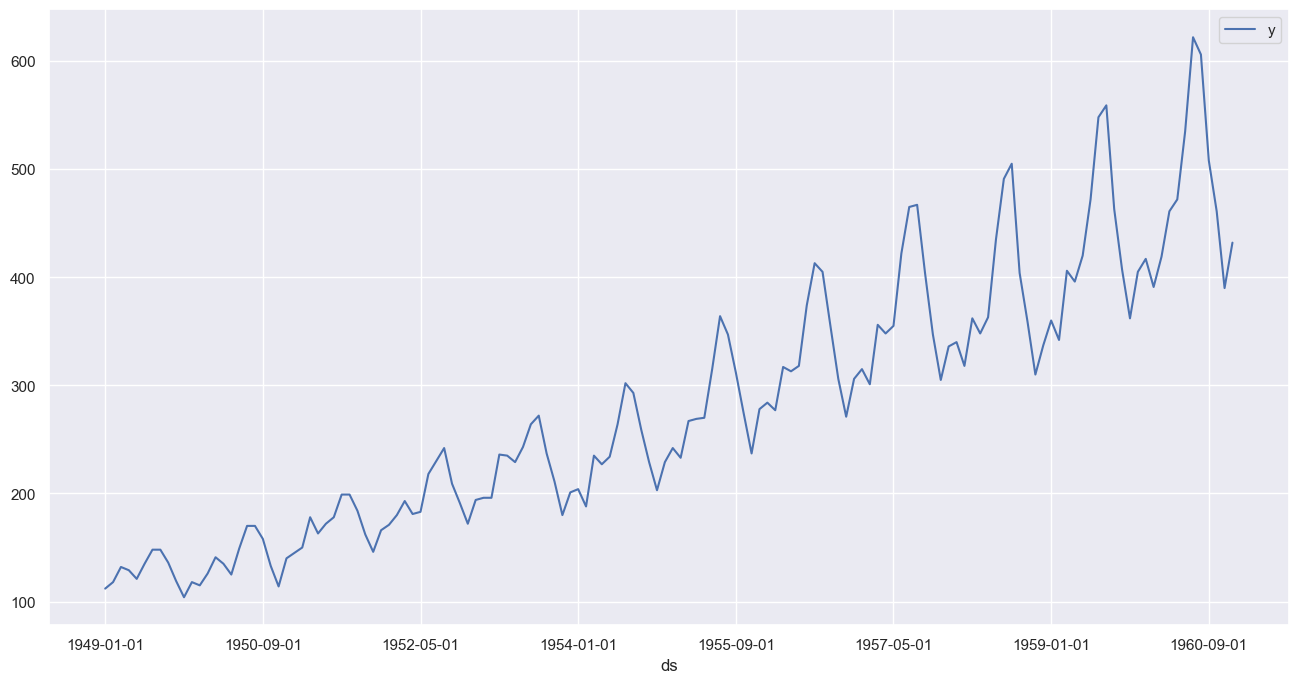

In [102]:
train_df['color'] = 'b'
train_df.set_index(time_col).plot(figsize=figsize, color=train_df['color']);

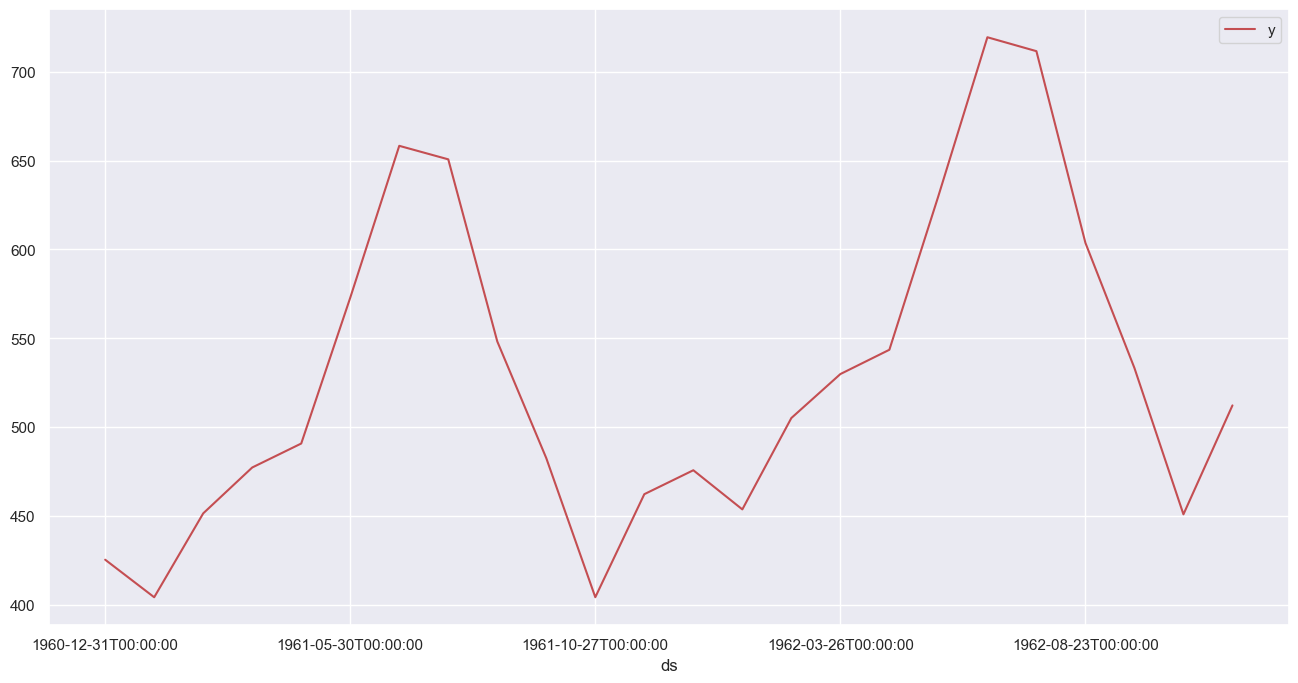

In [103]:
forecast_df['color'] = 'r'
forecast_df.set_index(time_col).plot(figsize=figsize, color=forecast_df['color']);

Combine train and test sets

In [104]:
df = pd.concat([train_df, forecast_df]).reset_index(drop=True)

In [105]:
df.shape

(168, 3)

In [106]:
df.head()

,ds,y,color
0,1949-01-01,112.0,b
1,1949-02-01,118.0,b
2,1949-03-01,132.0,b
3,1949-04-01,129.0,b
4,1949-05-01,121.0,b


In [107]:
df.tail()

,ds,y,color
163,1962-07-24T00:00:00,711.691483,r
164,1962-08-23T00:00:00,603.724986,r
165,1962-09-22T00:00:00,533.255271,r
166,1962-10-22T00:00:00,450.844267,r
167,1962-11-21T00:00:00,512.190425,r


Plot combined train and test sets with the vertical black line as the cut-off

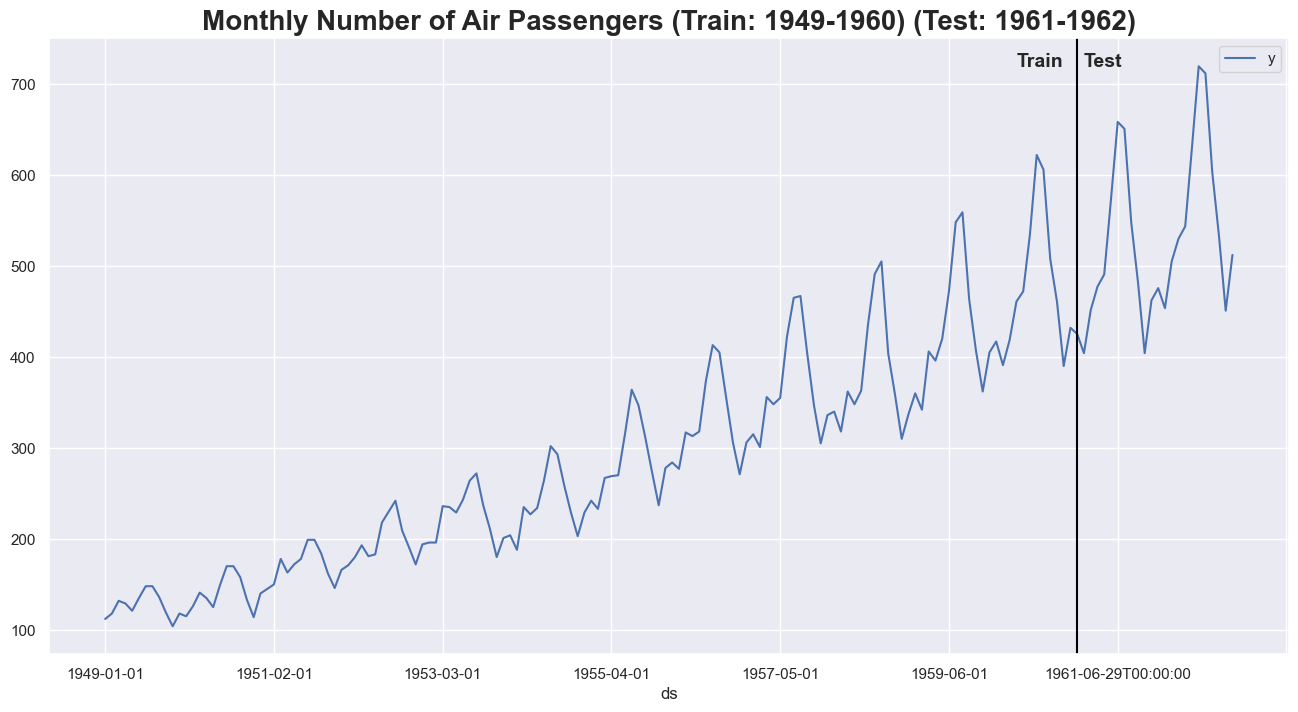

In [108]:
df.set_index(time_col).plot(figsize=figsize, color=df['color'])
plt.axvline(x=len(train_df), color='black', label='Train/Test set cut-off')
plt.text(x=len(train_df)-9, y=forecast_df[target_col].max(), s='Train', fontweight='bold', fontsize=14)
plt.text(x=len(train_df)+1, y=forecast_df[target_col].max(), s='Test', fontweight='bold', fontsize=14)
plt.title(label='Monthly Number of Air Passengers (Train: 1949-1960) (Test: 1961-1962)', fontweight='bold', fontsize=20)
plt.show();